Yeslamov Temirlan 22200836

Zholdas Aldanbergen 22211514

Language: German

Corpus: Kritik der reinen Vernunft by Immanuel Kant. https://gutenberg.org/ebooks/6342

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud
from nltk import word_tokenize, Text, pos_tag
from timeit import default_timer as timer
import matplotlib.pyplot as plt
from nltk.stem.snowball import GermanStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('universal_tagset')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\temir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\temir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\temir\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [2]:
def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

def preprocess_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read().lower()
        text = re.sub(r'http\S+', '', text)  # Remove URLs
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

file_path = 'nlp_text.txt'

preprocessed_file_path = 'nlp_text_preprocessed.txt'

text = preprocess_text(file_path)

with open(preprocessed_file_path, 'w', encoding='utf-8') as file:
    file.write(text)

tokens = word_tokenize(text, language='german')

print(tokens[:100])

['kritik', 'der', 'reinen', 'vernunft', 'von', 'immanuel', 'kant', 'professor', 'in', 'königsberg', '(', '1781', ')', 'sr', '.', 'exzellenz', ',', 'dem', 'königl', '.', 'staatsminister', 'freiherrn', 'von', 'zedlitz', 'gnädiger', 'herr', '!', 'den', 'wachstum', 'der', 'wissenschaften', 'an', 'seinem', 'teile', 'befördern', ',', 'heißt', 'an', 'ew', '.', 'exzellenz', 'eigenem', 'interesse', 'arbeiten', ';', 'denn', 'dieses', 'ist', 'mit', 'jenen', ',', 'nicht', 'bloß', 'durch', 'den', 'erhabenen', 'posten', 'eines', 'beschützers', ',', 'sondern', 'durch', 'das', 'viel', 'vertrautere', 'eines', 'liebhabers', 'und', 'erleuchteten', 'kenners', ',', 'innigst', 'verbunden', '.', 'deswegen', 'bediene', 'ich', 'mich', 'auch', 'des', 'einigen', 'mittels', ',', 'das', 'gewissermaßen', 'in', 'meinem', 'vermögen', 'ist', ',', 'meine', 'dankbarkeit', 'für', 'das', 'gnädige', 'zutrauen', 'zu', 'bezeigen', ',', 'womit']


# Calculate the lexical richness of the selected corpus.

In [3]:
unique_words = set(tokens)
lexical_richness = len(unique_words) / len(tokens)
print(f"Lexical Richness: {lexical_richness}")

Lexical Richness: 0.04711849275760415


# Plot the character distribution of your selected corpus.

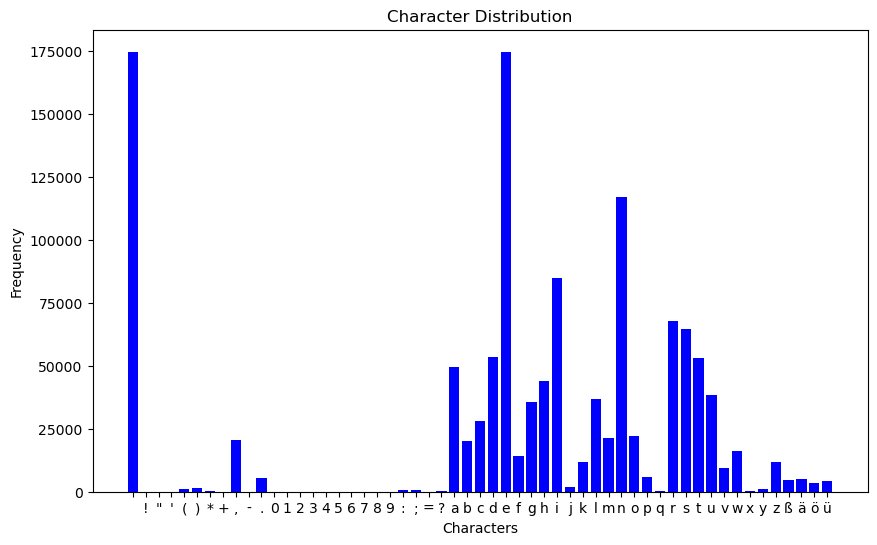

In [4]:
import collections 

char_counts = collections.Counter(text)
sorted_keys = sorted(char_counts.keys())
plt.figure(figsize=(10, 6))
plt.bar(sorted_keys, [char_counts[key] for key in sorted_keys], color='blue')  
plt.title('Character Distribution')
plt.xlabel('Characters')
plt.ylabel('Frequency')
plt.show()

# Plot the word distribution of the 20 most often used words of your selected corpus (with stopwords).

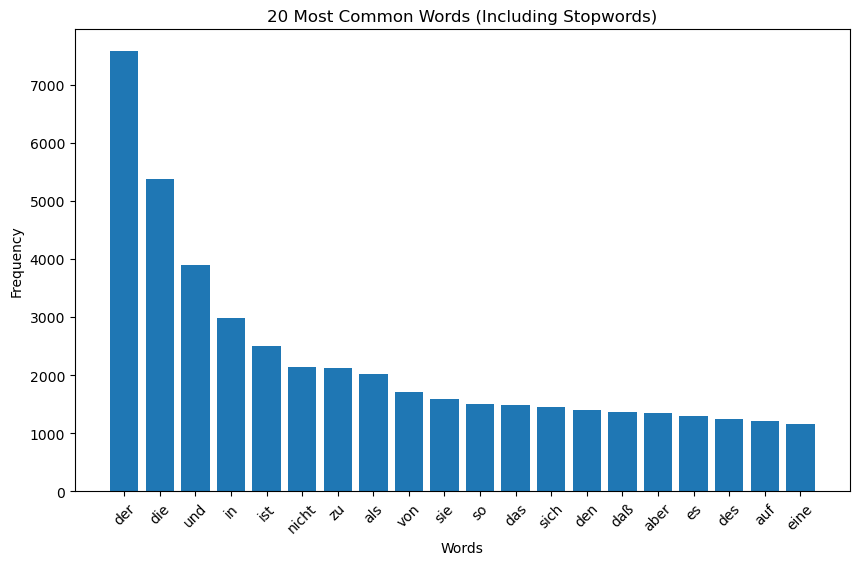

In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import collections

german_stopwords = set(stopwords.words('german'))

# Use a tokenizer that excludes punctuation
tokenizer = RegexpTokenizer(r'\w+')

text = preprocess_text(file_path)

# Tokenize text while excluding punctuation
tokens = tokenizer.tokenize(text)

filtered_tokens = [token for token in tokens if token.lower() not in german_stopwords and token.isalpha()]

word_freq = collections.Counter(tokens)
most_common_words = word_freq.most_common(20)

words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('20 Most Common Words (Including Stopwords)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Plot the dispersion plot of the 5 most often used words.

<Axes: title={'center': 'Dispersion Plot of the 5 Most Common Words'}, xlabel='Word Offset'>

<Figure size 1200x400 with 0 Axes>

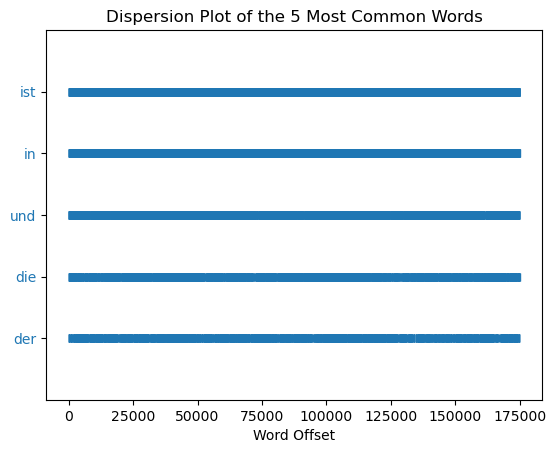

In [6]:
most_common_5_words = [word for word, count in most_common_words[:5]]
plt.figure(figsize=(12, 4))
nltk.draw.dispersion_plot(tokens, most_common_5_words, ignore_case=True, title='Dispersion Plot of the 5 Most Common Words')

# Find the longest word in the text. Select an algorithm for splitting words (also called word break / split algorithm) and split the word into subwords.

In [7]:
longest_word = max(unique_words, key=len)
print(f"Longest Word: {longest_word}")

subwords = re.findall(r'[\w]+', longest_word)
print("Subwords:", subwords)

Longest Word: mathematisch-transzendentalen
Subwords: ['mathematisch', 'transzendentalen']


# Find a short sentence with 5 words (plus/minus 1). Create a context-free grammar for the sentence. The grammar shall show the syntactical structure of the sentence, so the terminal symbols shall be words.

In [8]:
from nltk.tokenize import sent_tokenize

sentences = sent_tokenize(text)
short_sentence = next(sent for sent in sentences if 4 <= len(word_tokenize(sent)) <= 6)
print(f'Short sentence: {short_sentence}')

grammar = """
S -> NP VP
NP -> DT NN | DT JJ NN
VP -> VBZ NP
DT -> 'die' | 'das' | 'der'
JJ -> 'alte' | 'berühmte'
NN -> 'frage' | 'wahrheit'
VBZ -> 'ist'
"""
print(f'Context-free grammar:\n{grammar}')

Short sentence: allein diese bemühung ist vergeblich.
Context-free grammar:

S -> NP VP
NP -> DT NN | DT JJ NN
VP -> VBZ NP
DT -> 'die' | 'das' | 'der'
JJ -> 'alte' | 'berühmte'
NN -> 'frage' | 'wahrheit'
VBZ -> 'ist'



# Select a suitable stemmer and stem every word in the sentence found with part 9. Find a lemmatizer for the language and lemmatize every word in the sentence.

In [9]:
from nltk.stem.snowball import GermanStemmer

stemmer = GermanStemmer()
stemmed_words = [stemmer.stem(word) for word in word_tokenize(short_sentence, language='german')]
print("Stemmed Words:", stemmed_words)

import spacy
nlp = spacy.load("de_core_news_sm")
doc = nlp(short_sentence)
lemmatized_words = [token.lemma_ for token in doc]
print("Lemmatized Words:", lemmatized_words)

Stemmed Words: ['allein', 'dies', 'bemuh', 'ist', 'vergeb', '.']
Lemmatized Words: ['allein', 'dieser', 'Bemühung', 'sein', 'vergeblich', '--']


### Performing preprocessing second time to exclude non-alphanumeric characters

In [10]:
def preprocess_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read().lower()
        text = re.sub(r'[^a-zäöüß\s]', '', text)
    return text
file_path = 'nlp_text.txt'
preprocessed_file_path = 'nlp_text_preprocessed.txt'
text = preprocess_text(file_path)
with open(preprocessed_file_path, 'w', encoding='utf-8') as file:
    file.write(text)
tokens = word_tokenize(text, language='german')

# Remove stopwords and repeat exercises 6+7 (word distribution and dispersion plot).

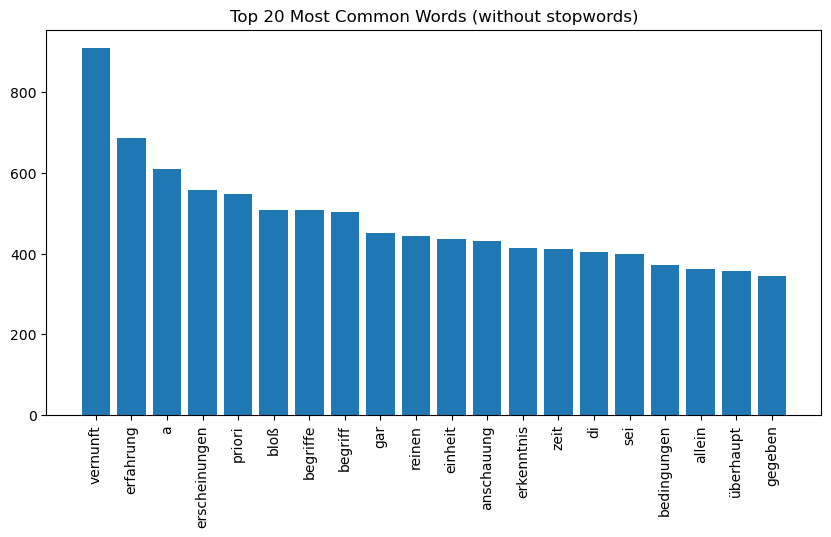

<Axes: title={'center': 'Dispersion Plot Without Stopwords'}, xlabel='Word Offset'>

<Figure size 1200x400 with 0 Axes>

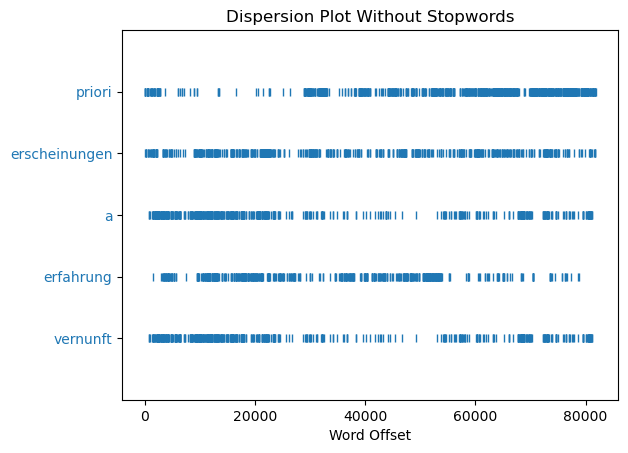

In [11]:
from collections import Counter
german_stopwords = set(stopwords.words('german'))

# Filter out stopwords from the list of tokens to focus on more meaningful words
filtered_tokens = [token for token in tokens if token not in german_stopwords]
filtered_word_freq = Counter(filtered_tokens)
most_common_filtered_words = filtered_word_freq.most_common(20)

# Plotting filtered word distribution
filtered_words, filtered_frequencies = zip(*most_common_filtered_words)
plt.figure(figsize=(10, 5))
plt.bar(filtered_words, filtered_frequencies)
plt.title('Top 20 Most Common Words (without stopwords)')
plt.xticks(rotation=90)
plt.show()

# Dispersion plot for filtered words
plt.figure(figsize=(12, 4))
nltk.draw.dispersion_plot(filtered_tokens, filtered_words[:5], ignore_case=True, title='Dispersion Plot Without Stopwords')

# Print a wordcloud without your stopwords.

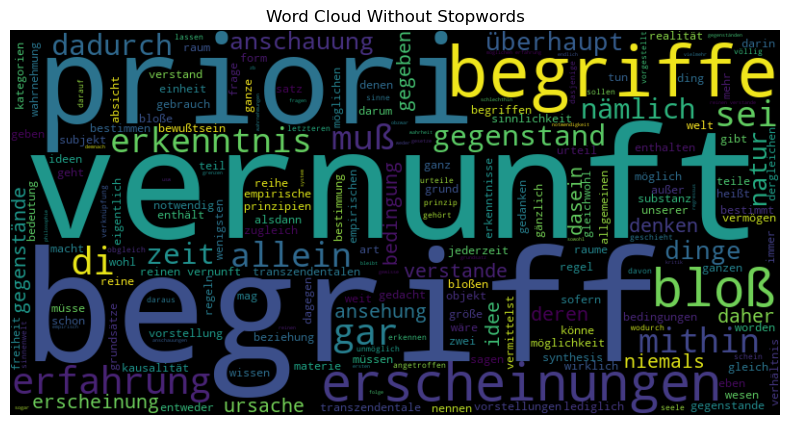

In [12]:
wordcloud = WordCloud(width=800, height=400).generate(' '.join(filtered_tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Without Stopwords')
plt.show()